<a href="https://colab.research.google.com/github/TimotheeeNiven/IntroML_TNiven/blob/main/Homework1_TNivenDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Build the MLP model
model1 = models.Sequential()

# Flatten the input
model1.add(layers.Flatten(input_shape=(32, 32, 3)))

# Hidden layers
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(128, activation='relu'))

# Output layer
model1.add(layers.Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model1.fit(x_train, y_train, epochs=40, batch_size=64, validation_split=0.2)

Epoch 1/40
625/625 [==============================] - 23s 34ms/step - loss: 2.2038 - accuracy: 0.1480 - val_loss: 2.0597 - val_accuracy: 0.2027
Epoch 2/40
625/625 [==============================] - 22s 35ms/step - loss: 2.0276 - accuracy: 0.2211 - val_loss: 1.9548 - val_accuracy: 0.2551
Epoch 3/40
625/625 [==============================] - 21s 33ms/step - loss: 1.9394 - accuracy: 0.2611 - val_loss: 1.9283 - val_accuracy: 0.2727
Epoch 4/40
625/625 [==============================] - 22s 35ms/step - loss: 1.8868 - accuracy: 0.2863 - val_loss: 1.8522 - val_accuracy: 0.2923
Epoch 5/40
625/625 [==============================] - 24s 38ms/step - loss: 1.8531 - accuracy: 0.3058 - val_loss: 1.8496 - val_accuracy: 0.3111
Epoch 6/40
625/625 [==============================] - 22s 36ms/step - loss: 1.8322 - accuracy: 0.3194 - val_loss: 1.8036 - val_accuracy: 0.3369
Epoch 7/40
625/625 [==============================] - 21s 33ms/step - loss: 1.8067 - accuracy: 0.3340 - val_loss: 1.8092 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 1.6006 - accuracy: 0.4324
Test accuracy: 43.24%


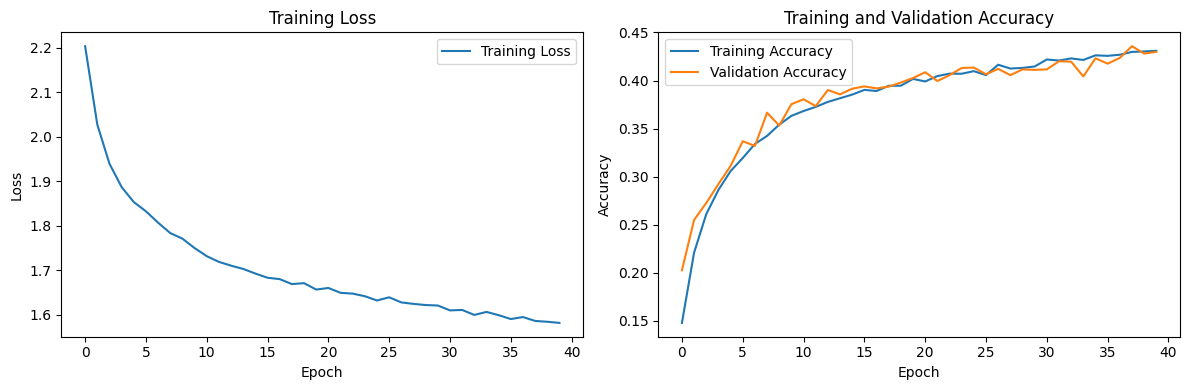

In [ ]:
#Plotting the Training loss and Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predictions = model1.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)]))

313/313 [==============================] - 2s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1000
           1       0.58      0.51      0.55      1000
           2       0.25      0.10      0.14      1000
           3       0.27      0.36      0.31      1000
           4       0.33      0.40      0.36      1000
           5       0.50      0.21      0.29      1000
           6       0.40      0.58      0.47      1000
           7       0.56      0.44      0.49      1000
           8       0.56      0.59      0.57      1000
           9       0.43      0.62      0.51      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.42     10000
weighted avg       0.44      0.43      0.42     10000



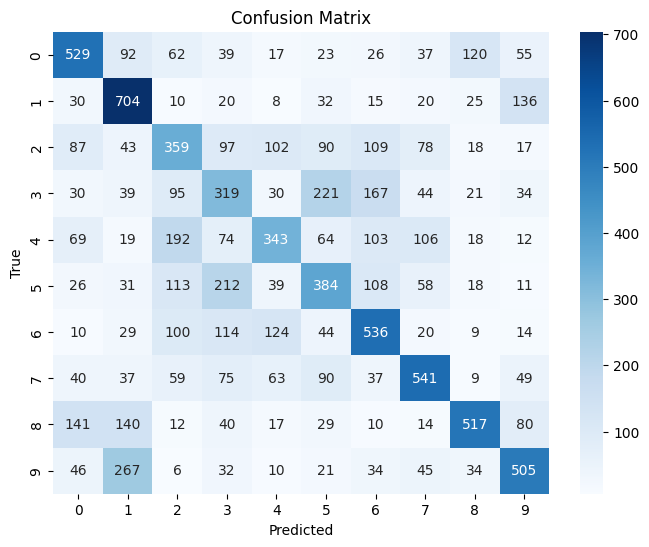

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Problem 2


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/IntroDeepLearning/CSVFiles/house-train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
useful_cols2A =['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','SalePrice']
df_train_prepro2A = df_train[useful_cols2A].copy()

# Convert all columns to numeric (float) and handle NaN values
df_train_prepro2A = df_train_prepro2A.apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = MinMaxScaler()
numerical_columns = df_train_prepro2A.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling to the numerical columns
df_train_prepro2A[numerical_columns] = scaler.fit_transform(df_train_prepro2A[numerical_columns])

In [ ]:
# Load the wine quality dataset from a CSV file
x2a = df_train_prepro2A.drop(['SalePrice'], axis=1).values
y2a = df_train_prepro2A['SalePrice'].values

# Split the data into train and validation sets
x_train2a, x_val2a, y_train2a, y_val2a = train_test_split(x2a, y2a, test_size=0.2, random_state=42)
x_train2a = torch.tensor(x_train2a, dtype=torch.float32)
y_train2a = torch.tensor(y_train2a, dtype=torch.float32)
x_val2a = torch.tensor(x_val2a, dtype=torch.float32)
y_val2a = torch.tensor(y_val2a, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset2a = TensorDataset(x_train2a, y_train2a)
val_dataset2a = TensorDataset(x_val2a, y_val2a)
train_loader2a = DataLoader(dataset=train_dataset2a, batch_size=32, shuffle=True)
val_loader2a = DataLoader(dataset=val_dataset2a, batch_size=32, shuffle=False)

In [ ]:
#Definition of network model class
class RegressionNet2a(nn.Module):
    def __init__(self):
        super(RegressionNet2a, self).__init__()
        self.fc1 = nn.Linear(12, 500)  # 6 input features
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)  # Output layer with 2 units for width and height

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Model, loss function, and optimizer
# Initialize the network
model2a = RegressionNet2a()
criterion = nn.MSELoss()
optimizer = optim.SGD(model2a.parameters(), lr=0.001)

In [ ]:
train_loss_list2a = []
val_loss_list2a = []

num_epochs = 40
for epoch in range(num_epochs):
    # Training phase
  model2a.train()
  train_loss2a = 0.0
  for inputs, targets in train_loader2a:
      optimizer.zero_grad()  # Clear existing gradients
      outputs = model2a(inputs)  # Forward pass

      # Reshape the target tensor to match the output shape
      targets = targets.view(-1, 1)

      loss = criterion(outputs, targets)  # Compute loss
      loss.backward()  # Backward pass (compute gradients)
      optimizer.step()  # Update model parameters
      train_loss2a += loss.item() * inputs.size(0)  # Accumulate the loss

      # Calculate average training loss
      train_loss2a /= len(train_loader2a.dataset)
      train_loss_list2a.append(train_loss2a)

      # Validation phase
      model2a.eval()
      val_loss2a = 0.0
      val_total2a = 0.0
      with torch.no_grad():
        for inputs, targets in val_loader2a:
            outputs2a = model2a(inputs)  # Forward pass
            loss2a = criterion(outputs2a, targets)  # Compute loss
            val_loss2a += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total2a += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
      val_loss2a /= len(val_loader2a.dataset)
      val_loss_list2a.append(val_loss2a)
      rmse = np.sqrt(val_total2a / len(val_loader2a.dataset))

    # Print training and validation results
      print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss2a:.4f}, Validation Loss: {val_loss2a:.4f}, Validation RMSE: {rmse:.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch[1/40], Train Loss: 0.0011, Validation Loss: 0.0393, Validation RMSE: 1.1280
Epoch[1/40], Train Loss: 0.0016, Validation Loss: 0.0573, Validation RMSE: 1.1157
Epoch[1/40], Train Loss: 0.0011, Validation Loss: 0.0417, Validation RMSE: 1.1174
Epoch[1/40], Train Loss: 0.0008, Validation Loss: 0.0292, Validation RMSE: 1.0864
Epoch[1/40], Train Loss: 0.0011, Validation Loss: 0.0396, Validation RMSE: 1.1133
Epoch[1/40], Train Loss: 0.0010, Validation Loss: 0.0353, Validation RMSE: 1.0809
Epoch[1/40], Train Loss: 0.0011, Validation Loss: 0.0409, Validation RMSE: 1.0797
Epoch[1/40], Train Loss: 0.0011, Validation Loss: 0.0400, Validation RMSE: 1.0727
Epoch[1/40], Train Loss: 0.0007, Validation Loss: 0.0267, Validation RMSE: 1.0365
Epoch[1/40], Train Loss: 0.0005, Validation Loss: 0.0181, Validation RMSE: 1.0200
Epoch[1/40], Train Loss: 0.0016, Validation Loss: 0.0579, Validation RMSE: 1.0800
Epoch[1/40], Train Loss: 0.0012, Validation Loss: 0.0435, Validation RMSE: 1.0397
Epoch[1/40], Tra

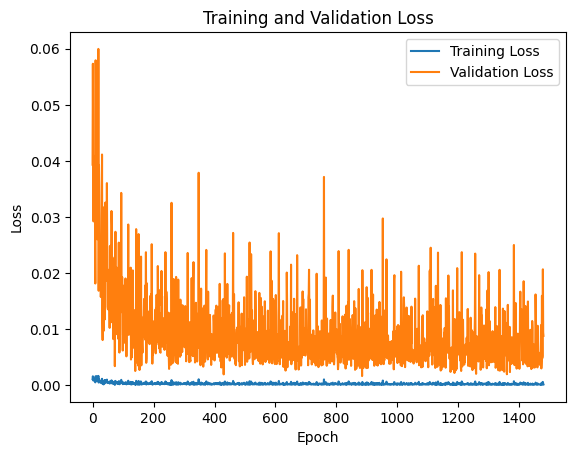

In [ ]:
# Plotting training and validation loss
plt.plot(train_loss_list2a, label='Training Loss')
plt.plot(val_loss_list2a, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [230]:
# Calculate average test loss (MSE) and RMSE
test_loss /= len(val_loader2a.dataset)
rmse_test = np.sqrt(val_total2a / len(val_loader2a.dataset))

# Print test results
print(f'Final Test Loss: {test_loss:.4f}')
print(f'Final Test RMSE: {rmse_test:.4f}')

Final Test Loss: 0.0000
Final Test RMSE: 0.5195


Problem 2B

In [ ]:
#Features used to modeling
usefull_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','Neighborhood','MSZoning'
                ,'Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition','SalePrice']
df_train_prepro = df_train[usefull_cols].copy()

# One-hot encoding
df_train_prepro = pd.get_dummies(df_train_prepro,columns=['Neighborhood','MSZoning','Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition'])
#One-hot encoding: convert categorical data variables into a form that could be provided to machine learning.
#It creates binary (0 or 1) columns for each category in the original data.
#pd.get_dummies(): Tconverts categorical variable(s) into dummy/indicator variables.

df_train_prepro = df_train_prepro.replace({True: 1, False: 0})

# Convert all columns to numeric (float) and handle NaN values
df_train_prepro = df_train_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)

scaler = MinMaxScaler()
numerical_columns = df_train_prepro.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling to the numerical columns
df_train_prepro[numerical_columns] = scaler.fit_transform(df_train_prepro[numerical_columns])
# Save the DataFrame to a CSV file
output_file = '/content/drive/MyDrive/IntroDeepLearning/CSVFiles/housing_df_train_prepro.csv'
df_train_prepro.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

DataFrame saved to /content/drive/MyDrive/IntroDeepLearning/CSVFiles/housing_df_train_prepro.csv


In [ ]:
x = df_train_prepro.drop(['SalePrice'], axis=1).values
y = df_train_prepro['SalePrice'].values

# Split the data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

In [243]:
#Definition of network model class
class ComplexRegressionNet(nn.Module):
    def __init__(self):
        super(ComplexRegressionNet, self).__init__()
        self.fc1 = nn.Linear(79, 500)
        self.fc2 = nn.Linear(500, 300)  # Adding an additional hidden layer
        self.fc3 = nn.Linear(300, 100)  # Adding another hidden layer
        self.fc4 = nn.Linear(100, 20)
        self.fc5 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Model, loss function, and optimizer
# Initialize the more complex network
model = ComplexRegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [244]:
train_loss_list = []
val_loss_list = []

num_epochs = 40
for epoch in range(num_epochs):
    # Training phase
  model.train()
  train_loss = 0.0
  for inputs, targets in train_loader:
      optimizer.zero_grad()  # Clear existing gradients
      outputs = model(inputs)  # Forward pass

      # Reshape the target tensor to match the output shape
      targets = targets.view(-1, 1)

      loss = criterion(outputs, targets)  # Compute loss
      loss.backward()  # Backward pass (compute gradients)
      optimizer.step()  # Update model parameters
      train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

      # Calculate average training loss
      train_loss /= len(train_loader.dataset)
      train_loss_list.append(train_loss)

      # Validation phase
      model.eval()
      val_loss = 0.0
      val_total = 0.0
      with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
      val_loss /= len(val_loader.dataset)
      val_loss_list.append(val_loss)
      rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
      print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

Epoch[1/40], Train Loss: 0.0032, Validation Loss: 0.1056, Validation RMSE: 1.8284
Epoch[1/40], Train Loss: 0.0025, Validation Loss: 0.1052, Validation RMSE: 1.8248
Epoch[1/40], Train Loss: 0.0020, Validation Loss: 0.1048, Validation RMSE: 1.8214
Epoch[1/40], Train Loss: 0.0028, Validation Loss: 0.1043, Validation RMSE: 1.8176
Epoch[1/40], Train Loss: 0.0028, Validation Loss: 0.1039, Validation RMSE: 1.8139
Epoch[1/40], Train Loss: 0.0029, Validation Loss: 0.1035, Validation RMSE: 1.8100
Epoch[1/40], Train Loss: 0.0031, Validation Loss: 0.1030, Validation RMSE: 1.8060
Epoch[1/40], Train Loss: 0.0031, Validation Loss: 0.1026, Validation RMSE: 1.8021
Epoch[1/40], Train Loss: 0.0026, Validation Loss: 0.1021, Validation RMSE: 1.7984
Epoch[1/40], Train Loss: 0.0025, Validation Loss: 0.1017, Validation RMSE: 1.7948
Epoch[1/40], Train Loss: 0.0026, Validation Loss: 0.1013, Validation RMSE: 1.7911
Epoch[1/40], Train Loss: 0.0020, Validation Loss: 0.1009, Validation RMSE: 1.7877
Epoch[1/40], Tra

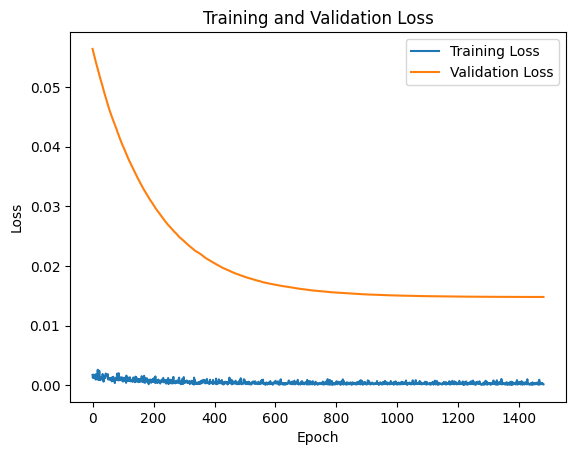

In [241]:
# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [242]:
# Calculate average test loss (MSE) and RMSE
test_loss /= len(val_loader.dataset)
rmse_test = np.sqrt(val_total / len(val_loader.dataset))

# Print test results
print(f'Final Test Loss: {test_loss:.4f}')
print(f'Final Test RMSE: {rmse_test:.4f}')

Final Test Loss: 0.0000
Final Test RMSE: 0.6863
